#  Integral de superficie

In [1]:
import time
print(' Última execución ', time.asctime() )

 Última execución  Mon Apr 15 11:42:05 2024



### Obxectivos

 Revisar a parametrización de superficies.

 Define a integral dunha función escalar e vectorial nunha superficie.

 Mostra algúns exemplos sinxelos.


*Nota*

Para que este notebook funcione en colab, precisamos <a href = "https://www.dropbox.com/scl/fi/wwz2w43kqj0s38gm87roj/graph_utils.py?rlkey=rppkwu9tmbnnsojezzj69p1r0&dl=1"> graph_utils.py</a>. Podes descargalo premendo na ligazón, e subilo a colab:


<img src="https://www.dropbox.com/scl/fi/b35vcated0f9lwrw4jy01/colab_upload.jpg?rlkey=l1ag15r0ovkg2dsefze117k1y&raw=1" width=200 align="center" />

In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

figsize = 6, 3.8
cmap    = 'hot'


### Integral nunha superficie

####  Revisión de parametrización de superficies.

 Vimos anteriormente que podemos parametrizar unha superficie, ${\bf \sigma}(u, v)$, dun espazo $\mathbb{R}^3$ como unha función vectorial definida nunha rexión $R$ dunha espazo $(u, v)$ de $\mathbb{R}^2$.

 $$
 \sigma(u, v) = \left( x(u, v), \, y(u, v), \, z(u, v) \right)
 $$



*Exemplo* : parametrización dun cilindro centrado na orixe, con eixe en $z$, raio $r$ e lonxitude infinita

 $$
 \sigma(\phi, z) = (r \cos \phi, \, r \sin \phi, z), \; \phi \in [0, 2\pi), \, z \in \mathrm{R}
 $$

 *Observa* : como se extraen as seguintes figuras da malla de $(u, v)$. Podes ver a súa grella.

 *Observa:* mira tamén as liñas da superficie, cada unha corresponde ao caso no que $u$ ou $v$ son constantes e a outra variable percorre os posibles valores do seu rango.


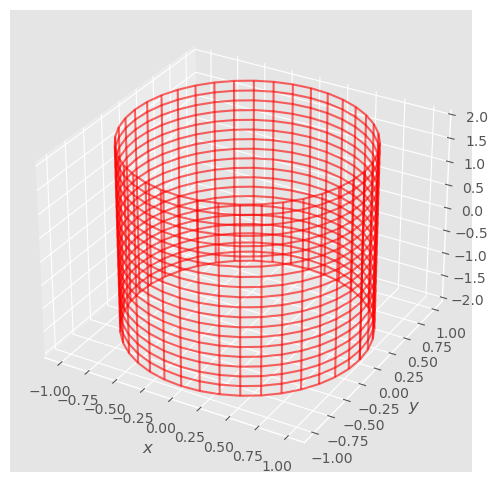

In [3]:
r, size = 1., 2.
phirange = (0., 2*np.pi, 41)
zrange   = (-size, size, 20) 
xfun = lambda phi, z : r * np.cos(phi)
yfun = lambda phi, z : r * np.sin(phi) 
zfun = lambda phi, z : z
gf.wfsurface(xfun, yfun, zfun, phirange, zrange, alpha = 0.6);


*Exemplo* : parametrización dunha esfera centrada na orixe do raio $r$.

 $$
 \sigma(\theta, \phi) = \left( r \sin \theta \cos \phi, r \sin \theta \sin \phi, r \cos \theta \right), \; \theta \in [0, \pi], \, \phi \in [0, 2 \pi)
 $$

 *Observa:* mira tamén as liñas da superficie, cada unha corresponde ao caso no que $u$ ou $v$ son constantes e a outra variable percorre os posibles valores do seu rango.


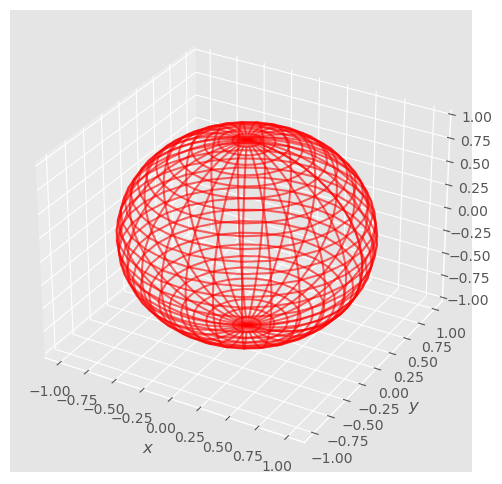

In [4]:
phirange   = (0., 2*np.pi, 30)
thetarange = (0.,   np.pi, 30) 
xfun = lambda phi, theta : r * np.sin(theta) * np.cos(phi)
yfun = lambda phi, theta : r * np.sin(theta) * np.sin(phi)
zfun = lambda phi, theta : r * np.cos(theta)
gf.wfsurface(xfun, yfun, zfun, phirange, thetarange, alpha = 0.6);


A superficie está construída a partir de liñas mestras. Establecido un valor de $u = u'$, se atravesamos $v$ no seu rango, $[v_0, v_1]$ obtemos as liñas mestras ao longo de $v$.

$$
{\bf c}_{u'}(v) = \left( x(u', v), y(u', v), z(u', v) \right), \; u = u' , \, v \in [v_0, v_1]
$$

E viceversa:

$$
{\bf c}_{v'}(u) = \left( x(u, v'), y(u, v'), z(u, v') \right), \; u = [u_0, u_1] , \, v = v'
$$


*Observa* : Na seguinte figura están marcadas dúas das liñas mestras do cilindro.

 *Explora* : cambia as liñas mestras que se debuxan, cambiando o elemento $(i, j)$ da malla $(u, v)$.


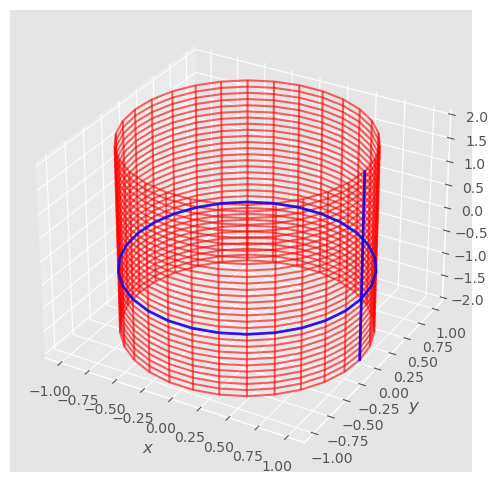

In [5]:
r, size = 1., 2.
phirange = (0., 2*np.pi, 31)
zrange   = (-size, size, 31) 
phii, zj = 0, 10
xfun = lambda phi, z : r * np.cos(phi)
yfun = lambda phi, z : r * np.sin(phi)
zfun = lambda phi, z : z
gf.wfsurface(xfun, yfun, zfun, phirange, zrange, alpha = 0.6);
gf.wfmasterlines(xfun, yfun, zfun, phirange, zrange, ui = phii, vj = zj);


*Observa* : Na seguinte figura están marcadas dúas das liñas mestras da esfera.

 *Explorar* : cambia as liñas mestras que se debuxan, cambiando o elemento $(i, j)$ da malla $(u, v)$.


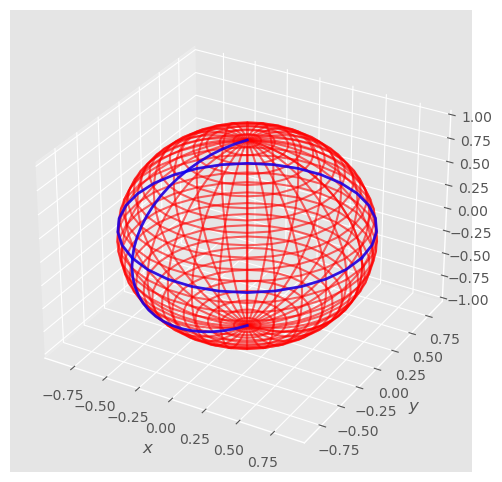

In [11]:
r          = 1.
phirange   = (0., 2*np.pi, 31)
thetarange = (0.,   np.pi, 31) 
phii, thetaj = 20, 14 # 20, 14
f0         =  0.85
xfun = lambda phi, theta : f0 * r * np.sin(theta) * np.cos(phi)
yfun = lambda phi, theta : f0 * r * np.sin(theta) * np.sin(phi)
zfun = lambda phi, theta : r * np.cos(theta)
gf.wfsurface(xfun, yfun, zfun, phirange, thetarange, alpha = 0.6);
gf.wfmasterlines(xfun, yfun, zfun, phirange, thetarange, ui = phii, vj = thetaj);
#plt.gca(projection='3d').auto_scale_xyz((-1, 1), (-1, 1), (-1, 1))
#plt.set_aspect('equal','box')


Nun punto $(u, v)$ podemos obter os vectores tanxentes ás rectas nese punto.

 $$
 {\bf t}_u = \frac{\partial \sigma(u, v)}{ \partial u}, \;
 {\bf t}_v = \frac{\partial \sigma(u, v)}{ \partial v}
 $$

 que están asociados co diferencial vector arco de cada liña mestra:

 $$
 {\bf t}_u \, \mathrm{d}u, \;
 {\bf t}_v \, \mathrm{d}v
 $$



O vector normal a ambos virá dado por:

 $$
 {\bf n} = {\bf t}_u \times {\bf t}_v
 $$

Pódeste decatar que ${\bf n}$ é a normal aos dous vectores e o seu módulo corresponde á área do paralelogramo soportado por ${\bf t}_u, \; {\bf t}_v$.

O diferencial de área

 $$
 \mathrm{d} \vec{\sigma} = {\bf n} \, \mathrm{d}u \mathrm{d} v, \; \mathrm{d}\sigma = |{\bf n}| \, \mathrm{d}u \mathrm{d} v,
 $$

 Diremos que unha superficie é regular sempre que ${\bf n}$ existe no rango completo de $(u, v)$.



*Observa* : os vectores tanxentes, ${\bf t}_u, \, {\bf t}_v$ á superficie dun punto e o seu vector normal ${\bf n}$.

 *Explora* : cambia a posición $(i, j)$ da malla $(u, v)$ onde debuxamos os tres vectores.


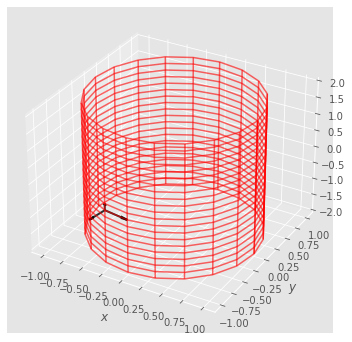

In [36]:
r, size = 1., 2.
phirange = (0., 2*np.pi, 21)
zrange   = (-size, size, 21) 
phii, zj = 14, 8
xfun = lambda phi, z : r * np.cos(phi)
yfun = lambda phi, z : r * np.sin(phi)
zfun = lambda phi, z : z
gf.wfsurface(xfun, yfun, zfun, phirange, zrange, alpha = 0.6);
gf.wfaxis(xfun, yfun, zfun, phirange, zrange, ui = phii, vj = zj);

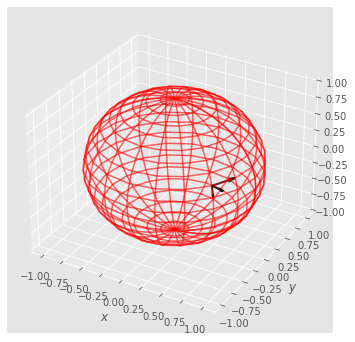

In [25]:
r          = 1.
phirange   = (0., 2*np.pi, 21)
thetarange = (0.,   np.pi, 21) 
thetai, phij = 8, 18
xfun = lambda theta, phi : r * np.sin(theta) * np.cos(phi)
yfun = lambda theta, phi : r * np.sin(theta) * np.sin(phi)
zfun = lambda theta, phi : r * np.cos(theta)
gf.wfsurface(xfun, yfun, zfun, thetarange, phirange, alpha = 0.6);
gf.wfaxis(xfun, yfun, zfun, thetarange, phirange, ui = thetai, vj = phij);


*Pregunta:* a seguinte superficie é regular?

 $$
 \sigma (\phi, z) = \left(z \cos \phi, z \sin \phi, z \right), \; \phi \in [0, 2 \pi), z \ge 0
 $$


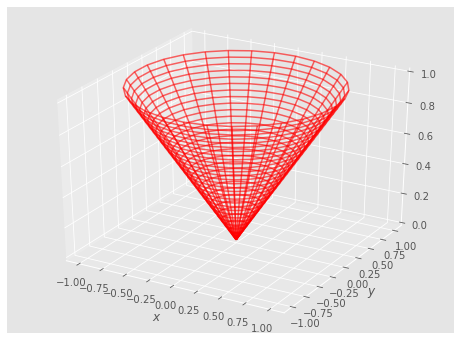

In [11]:
phirange = (0., 2*np.pi, 30)
zrange   = (0.,      1., 30) 
xfun = lambda phi, z : z * np.cos(phi)
yfun = lambda phi, z : z * np.sin(phi)
zfun = lambda phi, z : z 
gf.wfsurface(xfun, yfun, zfun, phirange, zrange, alpha = 0.6);


Se agora consideramos nun punto $(u, v)$ os elementos diferenciais do arco nas dúas liñas mestras son:

 $$
 {\bf t}_u \, \mathrm{d}u, \; {\bf t}_v \, \mathrm{d}v
 $$

 e o elemento diferencial de área que soportan é:

 $$
 \mathrm{d} \sigma = |{\bf n}| \, \mathrm{d}u \mathrm{d}v = | {\bf t}_u \times {\bf t}_v | \, \mathrm{d}u \mathrm{d}v
 $$


Entón, para obter a área dunha superficie parametrizada $\sigma (u, v)$ onde $(u, v)$ están definidos nunha rexión $R$, calculamos:

$$
S = \int_{\sigma} \mathrm{d}\sigma = \int_{R} |{\bf n} | \, \mathrm{d}u \mathrm{d}v = \int_{R} |{\bf t}_u \times {\bf t}_v | \, \mathrm{d}u \mathrm{d}v
$$


**Exemplo** : Calcula a área dunha esfera de raio $r$.



A superficie parametrizada é:

 $$
 \sigma(\theta, \phi) = \left( r \sin \theta \cos \phi, r \sin \theta \sin \phi, r \cos \theta \right), \; \theta \in [0, \pi], \, \phi\in [0, 2 \pi]
 $$

 E os vectores directores:

 $$
 {\bf t}_\theta = \left( r \cos \theta \cos \phi , r \cos \theta \sin \phi, - r \sin \theta \right)
 $$

 $$
 {\bf t}_\phi = \left( - r \sin \theta \sin \phi , r \sin \theta \cos \phi, 0 \right)
 $$


E o vector normal:

$$
{\bf n} = \left| \begin{array}{ccc} {\bf i} & {\bf j} & {\bf k} \\
r \cos \theta \cos \phi &  r \cos \theta \sin \phi & - r \sin \theta \\ - r \sin \theta \sin \phi &  r \sin \theta \cos \phi &  0 \end{array} \right| 
$$

Isto é:
   
$$
{\bf n} = \left( r^2 \sin^2 \theta \cos \phi, \; r^2 \sin^2 \theta \sin \phi, \; r^2 \cos \theta \sin \theta \right)
$$

Entón

$$
|{\bf n}| = \sqrt{r^4 \sin^4 \theta + r^4 \cos^2 \theta \sin^2 \theta} = r^2\sin \theta
$$

A área da superficie é:

$$
S = \int_{\sigma} \mathrm{d}\sigma = \int_R |{\bf n}| \, \mathrm{d} u \mathrm{d}v  = \int_0^\pi \int_0^{2\pi} r^2 \sin \theta \, \mathrm{d}\phi \mathrm{d} \theta
$$

$$
= r^2 \, \phi \Big|_0^{2 \pi} \, (-\cos \theta)\Big|_0^{\pi} = 4 \pi r^2
$$


#### Parametrización da superficie dunha gráfica.

 Podemos considerar a gráfica dunha función $f(x, y)$ definida nunha relación $R$ como a parametrización dunha superficie con $(x, y)$

 $$
 \sigma(x, y) = \left( x, y, z = f(x, y) \right)\; (x, y) \in \mathrm{R}
 $$



Neste caso, os vectores directores e o vector normal teñen expresións máis sinxelas:

 $$
 {\bf t}_x(x, y) = \left( 1, 0, \frac{\partial z}{\partial x}\right),
 $$

 $$
 {\bf t}_y(x, y) = \left(0, 1, \frac{\partial z}{ \partial y} \right)
 $$

 e:

$$
{\bf n} 
= \left| \begin{array}{ccc} {\bf i} & {\bf j} & {\bf k} \\
 1 &  0 & \frac{\partial z}{\partial x} \\
 0 &  1 & \frac{\partial z}{\partial y} \\
 \end{array} 
 \right| = \left(-\frac{\partial z}{\partial x}, -\frac{\partial z}{\partial y}, 1\right) 
$$

E o módulo:

$$
|{\bf n}| = \sqrt{1 + \left(\frac{\partial z}{\partial x}\right)^2 + \left(\frac{\partial z}{\partial y} \right)^2}
$$




*Observa* : a seguinte figura, onde se representa a gráfica da función $f(x, y) = x^2 + y^2$, e se debuxa unha partición da rexión $(x, y)$. Para cada un dos rectángulos da gráfica, que é unha pequena sección dun plano, damos a súa área como:

$$
\mathrm{d} \sigma =
\sqrt{1 + \left(\frac{\partial z}{\partial x}\right)^2 + \left(\frac{\partial z}{\partial y} \right)^2} \, \mathrm{d}x \mathrm{d}y
$$

 Mentres que a área dos rectángulos en $(x, y) $ que os soportan é
 $
 \mathrm{d}x\mathrm{d}y
 $

 Podemos reescribir:

$$
\mathrm{d}x \mathrm{d}y = \mathrm{d}\sigma \; {\cos \gamma}, \;\;
\cos \gamma = \frac{1}{\sqrt{1 + \left(\frac{\partial z}{\partial x}\right)^2 + \left(\frac{\partial z}{\partial y} \right)^2}}
$$

 Onde $\gamma$ é agora o ángulo que forma a normal, ${\bf n}$, co eixo $z$.

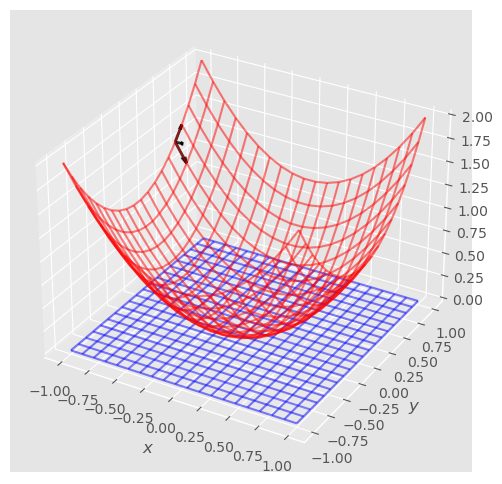

In [12]:
xrange = (-1., 1., 20)
xfun = lambda x, y : x
yfun = lambda x, y : y
zfun = lambda x, y : x*x + y*y
zero = lambda x, y : 0*x + 0*y
gf.wfsurface(xfun, yfun, zfun, xrange, xrange, alpha = 0.5);
gf.wfaxis   (xfun, yfun, zfun, xrange, xrange, 0, 15)
gf.wfsurface(xfun, yfun, zero, xrange, xrange, newfig = False, alpha = 0.5, color = 'b');


#### Integral dunha función escalar nunha superficie

 Sexa $S$ unha superficie parametrizada con $\sigma(u, v)$ nunha rexión $R$ de $(u, v)$, e $f(x, y, z)$ sexa unha función escalar definida nos puntos da superficie. Chamamos á integral da función $f(x, y, z)$ na superficie $\sigma(u, v)$ a:

 $$
 \int_{S} f(x, y, z) \, \mathrm{d}\sigma = \int_R f(\sigma(u, v)) \, |{\bf n}| \mathrm{d}u \mathrm{d}v
 $$



*Pregunta* : ¿Podes dar unha interpretación da integral dunha función escalar nunha superficie?



**Exercicio** : Integra a función $f(x, y, z) = \sqrt{x^2 + y^2 +1}$ no helicoloide dado por $\sigma (r, \theta) = \left( r \cos \theta, r \sin \theta, \theta \right)$ con $\theta \in [0, 2 \pi]$ e $r \in [0, 1]$


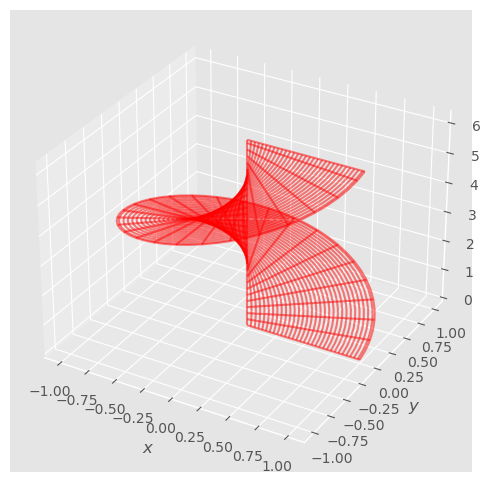

In [14]:
thetarange = (0., 2*np.pi, 60)
rrange     = (0.,      1., 60)
xfun = lambda r, theta : r * np.cos(theta) 
yfun = lambda r, theta : r * np.sin(theta) 
zfun = lambda r, theta : theta
gf.wfsurface(xfun, yfun, zfun, rrange, thetarange, alpha = 0.5);

A partir da superficie parametrizada:

$$
\sigma (r, \theta) = \left( r \cos \theta, r \sin \theta, \theta \right)
$$

Calculamos os vectores:

$$
{\bf t}_r = \left( \cos \theta, \sin \theta, 0 \right),
$$
$$
{\bf t}_{\theta} = \left( - r \sin \theta, r \cos \theta, 1 \right)
$$

e o vector normal

$$
{\bf n} = \left| \begin{array}{ccc} {\bf i} & {\bf j} & {\bf k} \\
  \cos \theta      &  \sin \theta  & 0 \\
   - r \sin \theta & r \cos \theta & 1\\
 \end{array} 
 \right| = \left(\sin \theta, - \cos \theta, r \right) 
$$


A función na superficie é:

 $$
 f(\sigma(r, \theta)) = \sqrt{ r^2 \cos^2 \theta + r^2 \sin^2 \theta + 1} = \sqrt{r^2 +1 }
 $$

 Diferencial de área:

 $$
 \mathrm{d}\sigma = |{\bf n}| \, \mathrm{d}\theta \mathrm{d}r = \sqrt{1+r^2} \, \mathrm{d}\theta \mathrm{d}r
 $$

 E a integral da función na superficie:

 $$
 \int_{\sigma} f(x, y, z) \, \mathrm{d} \sigma
 = \int_0^{2 \pi} \int_0^1 \sqrt{r^2 + 1} \sqrt{r^2 +1} \, \mathrm{d}r \mathrm{d}\theta
 $$

 $$
 = \int_0^{2 \pi} \int_0^1 (r^2 +1) \, \mathrm{d}r \mathrm{d}\theta
 = 2 \pi \left( r + \frac{r^3}{3 }\right) \Big|_0^1 = \frac{8 \pi}{3}
 $$



#### Integral dunha función vectorial a través dunha superficie

 Sexa $S$ unha superficie parametrizada con $\sigma(u, v)$ nunha rexión $R$ de $(u, v)$, e ${\bf F}(x, y, z) = \left ( F_x, F_y, F_z \right)$ unha función vectorial definida nos puntos da superficie.

 Chamamos á integral da función ${\bf F}(x, y, z)$ a través da superficie $\sigma(u, v)$ a:

 $$
 \int_{\sigma} {\bf F}(x, y, z) \, \mathrm{d} \vec{\sigma} = \int_R {\bf F}(\sigma(u, v)) \, {\bf n} \, \mathrm{d}u \mathrm{d}v
 $$



*Pregunta* : Podes dar unha interpretación da integral dun campo ${\bf F}$ a través dunha superficie? En Física seguramente xa atopaches este caso antes. Co concepto de fluxo!



**Exercicio** : Integra o campo ${\bf F}(x, y, z) = (x, y, z)$ sobre a esfera de raio unitario.


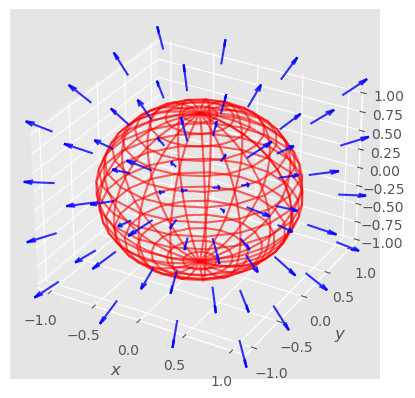

In [15]:
r = 1
phirange   = (0., 2*np.pi, 20)
thetarange = (0.,   np.pi, 20) 
xrange     = (-1., 1., 4)
Ex   = lambda x, y, z : x
Ey   = lambda x, y, z : y
Ez   = lambda x, y, z : z
xfun = lambda phi, theta : r * np.sin(theta) * np.cos(phi)
yfun = lambda phi, theta : r * np.sin(theta) * np.sin(phi)
zfun = lambda phi, theta : r * np.cos(theta)
gf.quiver3d(Ex, Ey, Ez, xrange, xrange, xrange, color = 'b')
gf.wfsurface(xfun, yfun, zfun, phirange, thetarange, color = 'r', alpha = 0.6, newfig = False);

Antes vimos:

$$
{\bf n} = \left(
\sin^2 \theta \cos \phi,  \sin^2 \theta \sin \phi, \cos \theta \sin \theta
\right)
$$

 O campo da esfera é:

$$
{\bf F}(\sigma(\theta, \phi)) 
= (\sin \theta \cos \phi, \sin \theta \sin \phi, \cos \theta)
$$

 Polo tanto:

$$
{\bf F}(\sigma (\theta, \phi)) \, {\bf n} = 
 \sin^3 \theta \cos^2 \phi +  \sin^3 \theta \sin^2 \phi + \sin \theta \cos^2 \theta =  \sin \theta
$$

E a integral

$$
\int_{\sigma} {\bf F}({\bf x}) \, \mathrm{d} \vec{\sigma}
= \int_0^{2 \pi} \int_0^{\pi}  \sin \theta \, \mathrm{d}\theta \mathrm{d}\phi
= 4 \pi 
$$

